In [1]:
import os
import pkg_resources
import sys
import subprocess
import time


def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])


# List of required packages
required_packages = ['ipywidgets', 'jupyter', 'matplotlib', 'numpy',
                     'optuna-integration[sklearn]', 'optuna',  'pandas', 'scikit-learn']

# Check if packages are installed, and install if not
for package in required_packages:
    try:
        pkg_resources.get_distribution(package)
    except pkg_resources.DistributionNotFound:
        install(package)

# Check if the environment is activated
if 'CONDA_DEFAULT_ENV' in os.environ:
    print(f"Environment '{os.environ['CONDA_DEFAULT_ENV']}' is activated.")
else:
    print("No specific environment is activated.")

Environment 'research' is activated.


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from warnings import simplefilter

if not sys.warnoptions:
    simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"
np.random.seed(42)

In [3]:
# Load the Boston dataset
# dataset = "boston"
# raw_df = pd.read_csv("data/boston.csv")
# X = raw_df.drop(columns=['MEDV']).values
# y = raw_df['MEDV'].values

In [4]:
# # Load the store sales dataset
# dataset = "store_sales"
# excel_file = pd.ExcelFile('data/store_sales.xlsx')
# sheet_names = excel_file.sheet_names

# # Read the data
# results_df = pd.read_excel(excel_file, sheet_name=sheet_names[2])  # 2, 9
# iri_key_counts = results_df['IRI_KEY'].value_counts()
# iri_keys = iri_key_counts[iri_key_counts > 300].index


# features = ['F', 'D', 'Unit.Price']
# target = ['Total.Volume']

# results_df = results_df[results_df['IRI_KEY'] == iri_keys[0]]
# X = results_df[features]
# y = results_df[target]

# sheet_names, iri_keys, X.shape, y.shape

In [5]:
# # Load the California housing dataset
# from sklearn.datasets import fetch_california_housing
# dataset = "california"
# housing = fetch_california_housing()

# X = pd.DataFrame(housing.data, columns=housing.feature_names)  # type: ignore
# y = pd.DataFrame(housing.target, columns=housing.target_names)  # type: ignore

# X.shape, y.shape

In [6]:
# # Load the soybean dataset
# dataset = "soybean"
# raw_df = pd.read_excel("data/soybean.xlsx")
# # X = raw_df.values[:-1, [5, 6, 15, 16, 17, 26,
# #                         34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]  # 9 check yield 12 rm band
# # y = raw_df.values[:-1, 11]
# X = raw_df.iloc[:-1, [5, 6, 15, 16, 17, 26,
#                   34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
# y = raw_df.iloc[:-1, [11]]
# X.shape, y.shape

In [7]:
# # Load LengthOfStay
# dataset = "LengthOfStay"
# raw_df = pd.read_csv("data/LengthOfStay.csv")
# categorical_cols = raw_df.select_dtypes(
#     include=['object', 'category']).columns.tolist()
# raw_df = raw_df.drop(columns=categorical_cols)
# X = pd.DataFrame(raw_df.drop(columns=['eid', 'lengthofstay']))
# y = pd.DataFrame(raw_df['lengthofstay'].values)

In [8]:
# Load HospitalStay
dataset = "HospitalStay"
raw_df = pd.read_csv("data/Healthcare_Investments_and_Hospital_Stay.csv")
categorical_cols = raw_df.select_dtypes(
    include=['object', 'category']).columns.tolist()
# one_hot_encoded = one_hot_encoder.fit_transform(raw_df[categorical_cols])
# raw_df = pd.concat([raw_df.drop(columns=categorical_cols),
#                     pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out())], axis=1)
raw_df = raw_df.drop(columns=categorical_cols)
X = pd.DataFrame(raw_df.drop(columns=['Hospital_Stay']).values)
y = pd.DataFrame(raw_df['Hospital_Stay'].values)

In [9]:
display(X.describe(), y.describe())

,0,1,2,3
count,518.000000,518.000000,518.000000,518.000000
mean,2007.967181,10.565502,19.646718,10.565502
std,6.944160,8.685570,14.352069,8.685570
min,1990.000000,0.100000,1.480000,0.100000
25%,2003.250000,4.072500,10.332500,4.072500
50%,2009.000000,8.765000,15.375000,8.765000
75%,2014.000000,13.877500,26.592500,13.877500
max,2018.000000,55.210000,111.490000,55.210000


,0
count,518.000000
mean,7.140154
std,2.566864
min,3.400000
25%,5.800000
50%,6.650000
75%,7.500000
max,32.700000


In [10]:
# # Remove Outliers
# def remove_outliers(df, threshold=3):
#     z_scores = np.abs((df - df.mean()) / df.std())
#     return df[(z_scores < threshold).all(axis=1)]
# filtered_train_data = train_data
# for col in train_data.columns:
#     value_counts = train_data[col].value_counts().sort(by='count')
#     valid = value_counts.filter(pl.col('count') > value_counts['count'].max()/len(value_counts))[col]
#     filtered_train_data = filtered_train_data.filter(pl.col(col).is_in(valid))
# display(filtered_train_data, filtered_train_data.describe())

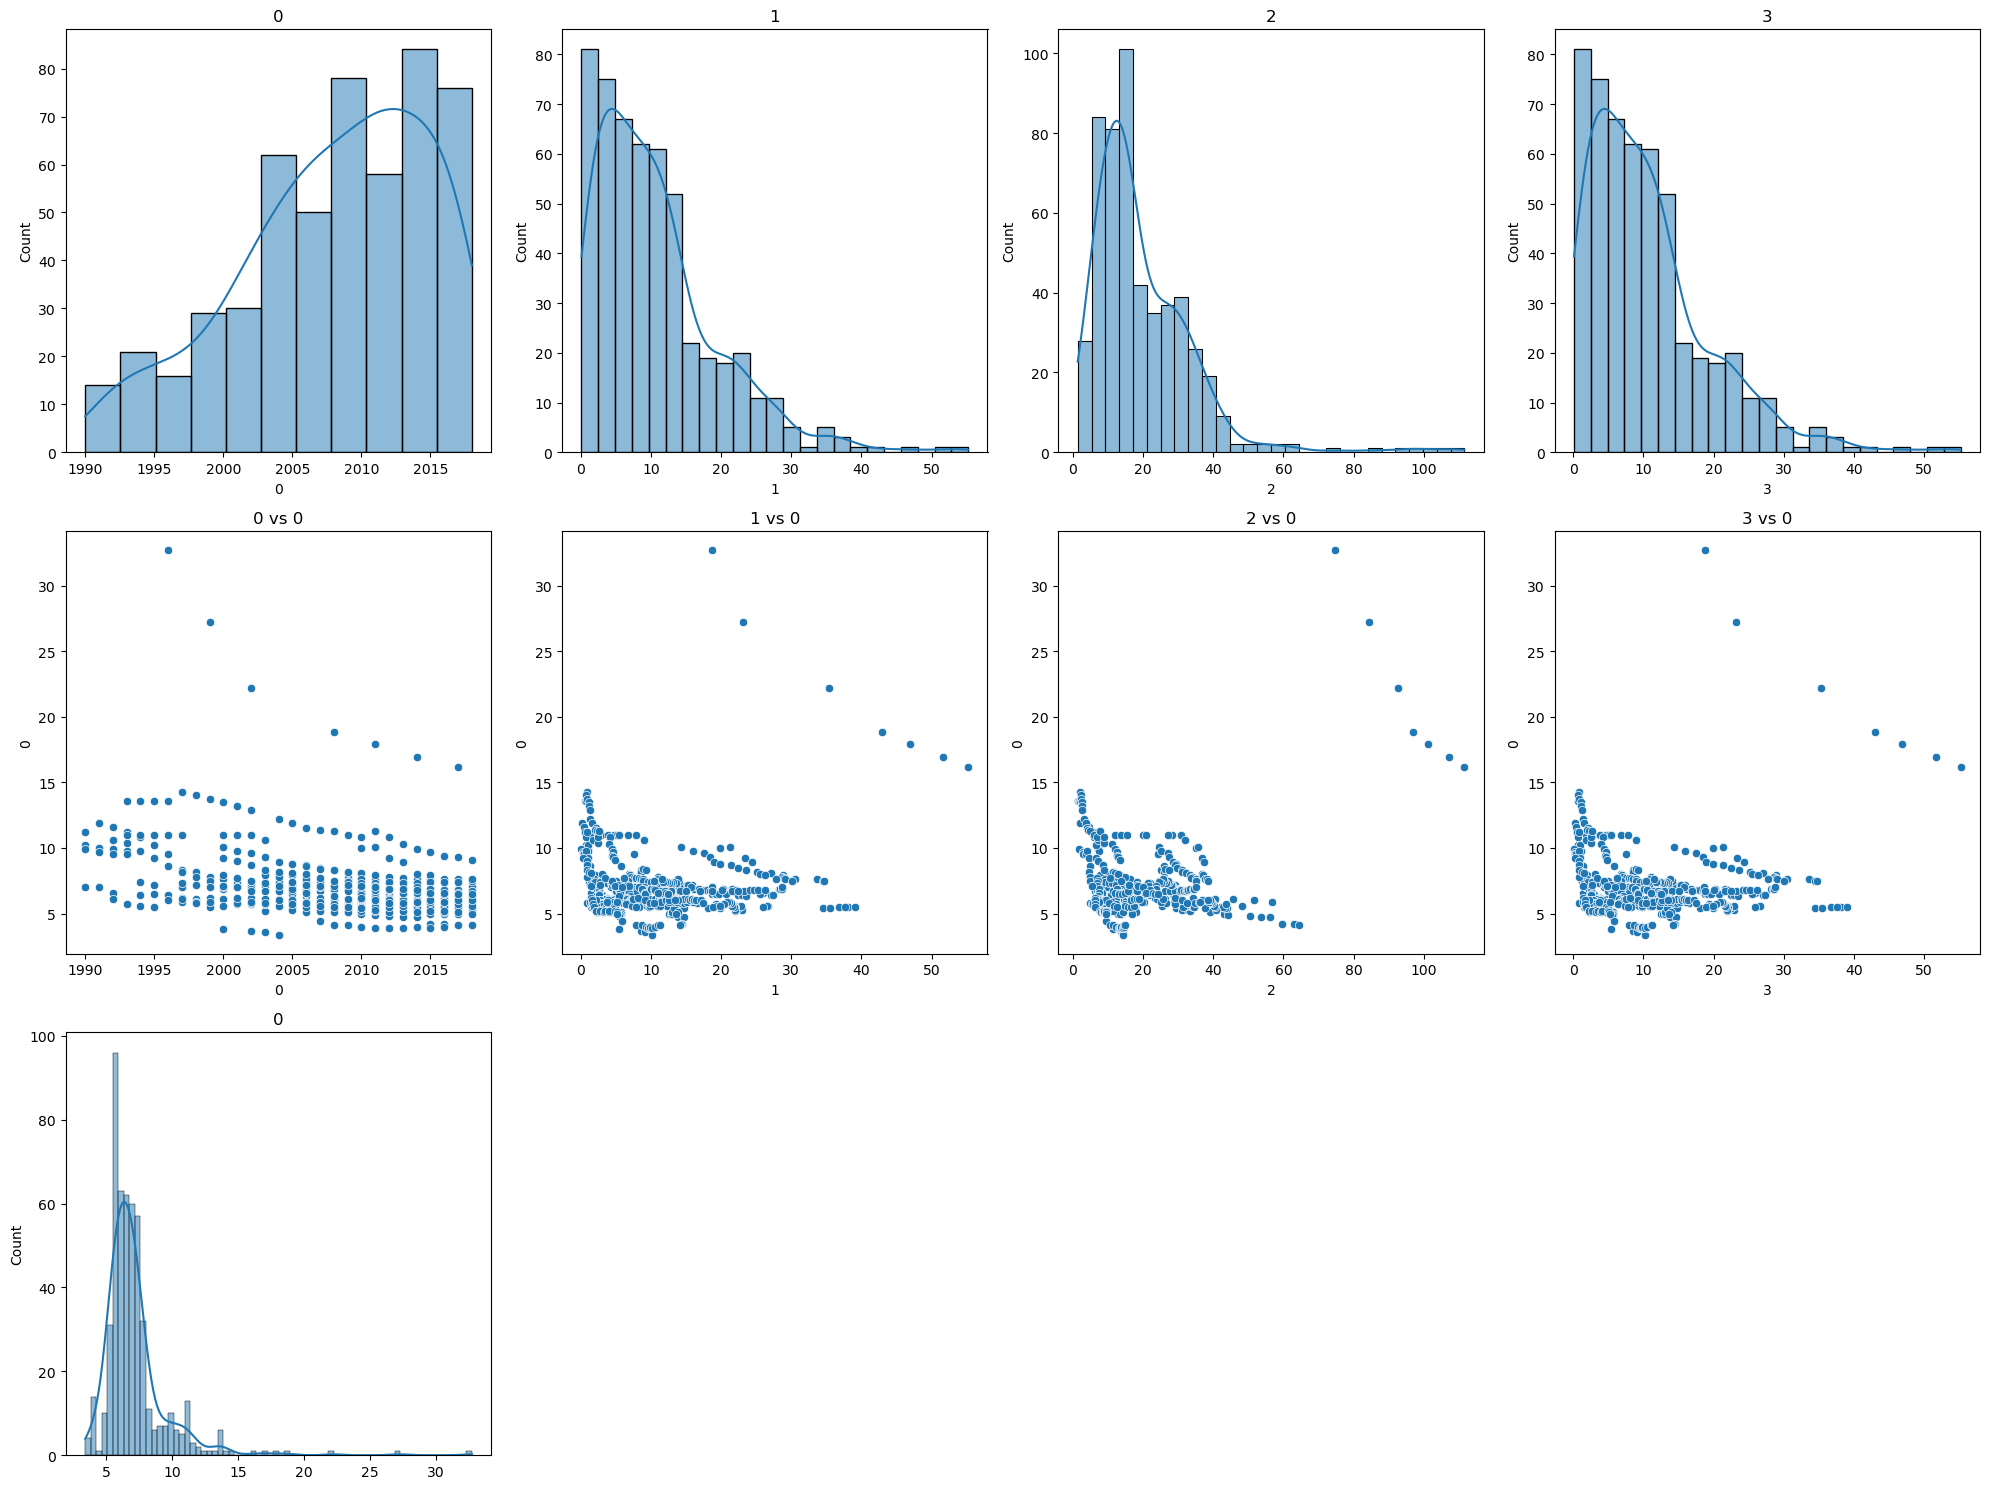

In [11]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(X, y, cols=4):
    fig, axs = plt.subplots(
        (X.shape[1]+X.shape[1]*y.shape[1] + y.shape[1]+cols-1)//cols, cols, figsize=(20, 15))
    axs = axs.flatten()

    a = 0
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.tick_params(axis='both', which='major')
        ax.tick_params(axis='both', which='minor')
    a += i + 1
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        for j, ycol in enumerate(y.columns):
            ax = axs[a+i+j*y.shape[1]]
            sns.scatterplot(x=data, y=y[ycol], ax=ax)
            ax.set_title(f'{col} vs {ycol}')
            ax.set_xlabel(col)
            ax.set_ylabel(ycol)
    a += i + 1
    for i, col in enumerate(y.columns):
        data = y[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
    a += i+1
    for j in range(a, len(axs)):
        fig.delaxes(axs[j])

    fig.tight_layout()
    plt.show()
    
plot_data(X, y)

In [12]:
# Define search
from optuna.integration.sklearn import OptunaSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

SCALERS = {
    'identity': None,
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler(),
    'quantile': QuantileTransformer(),
}

search_params = {
    'cv': 3,
    'n_jobs': -1,  # -1,
    'n_trials': 1,
    # 'n_trials': None,
    'random_state': 42,
    'return_train_score': True,
    'scoring': 'neg_root_mean_squared_error', # r2
    'timeout': 10,
    # 'timeout': None,
    'verbose': 1
}

default_scaler = SCALERS['identity']


def search(model, param_grid={}, scaler=default_scaler, search_params=search_params):
    search_params = search_params.copy()
    # search_params['n_trials'] = int(4**len(param_grid))
    return OptunaSearchCV(Pipeline([('scaler', scaler), ('model', model)]), {f'model__{k}': v for k, v in param_grid.items()}, **search_params)

In [13]:
# Define search grids
from optuna.distributions import CategoricalDistribution, IntDistribution, FloatDistribution

mlp_sk_param_grid = {
    'learning_rate_init': FloatDistribution(1e-2, 1e-1, log=True),
    'max_iter': IntDistribution(400, 400, log=True),
    # 'early_stopping': CategoricalDistribution([True]),
}

fonn1_sk_param_grid = {
    'learning_rate_init': FloatDistribution(1e-2, 1e-1, log=True),
    'max_iter': IntDistribution(400, 400, log=True),
}
 
fonn2_sk_param_grid = {
    'learning_rate_init': FloatDistribution(1e-2, 1e-1, log=True),
    'max_iter': IntDistribution(400, 400, log=True),
}

mlp_old_param_grid = {
    'learning_rate_init': FloatDistribution(1e-3, 1e-3, log=True),
    'max_iter': IntDistribution(1000, 1000, log=True),
}

fonn1_old_param_grid = {
    'learning_rate_init': FloatDistribution(5e-3, 5e-3, log=True),
    'max_iter': IntDistribution(2000, 2000, log=True),
}
 
fonn2_old_param_grid = {
    'learning_rate_init': FloatDistribution(1e-3, 1e-3, log=True),
    'max_iter': IntDistribution(1000, 1000, log=True),
}

In [14]:
from models_sklearn import Tree, Ensemble, MLP as MLP_sk, FONN1 as FONN1_sk, FONN2 as FONN2_sk, TREENN1 as TREENN1_sk, TREENN2 as TREENN2_sk
from models import MLP, FONN1, FONN2, TREENN1, TREENN2
# from models_old import FONN1 as FONN1_old, FONN2 as FONN2_old, TREENN1 as TREENN1_old, TREENN2 as TREENN2_old

models = {}

num_trees_input = 5
num_trees_hidden = 5
hidden_nodes = [10]
# hidden_nodes = [5, 10]

scalers = ['identity', 'standard']

models['Tree'] = search(Tree())
for hn in hidden_nodes:
    for s in scalers:
        scaler = SCALERS[s]
        models[f'Ensemble_sk_{s} {hn}'] = search(Ensemble(hn))
        models[f'MLP_sk_{s} {hn}'] = search(
            MLP_sk(hn), mlp_sk_param_grid, scaler)
#         models[f'MLP_sk_tanh_{s} {hn}'] = search(
#             MLP_sk(hn, activation='tanh'), mlp_sk_param_grid, scaler)
        models[f'FONN1_sk_{s} {num_trees_input} {hn}'] = search(
            FONN1_sk(num_trees_input, num_trees_input+hn), fonn1_sk_param_grid, scaler)
        models[f'FONN2_sk_{s} {num_trees_hidden} {hn}'] = search(
            FONN2_sk(hn, num_trees_hidden+hn), fonn2_sk_param_grid, scaler)
# if isinstance(hn, tuple):
#     models[f'Ensemble {sum(hn)}'] = search(Ensemble(sum(hn)))
#     models[f'FONN1_sk {num_trees_input} {hn}'] = search(
#         FONN1_sk(num_trees_input, (num_trees_input+hn[0], *hn[1:])), mlp_sk_param_grid)
#     models[f'FONN2_sk {num_trees_hidden} {hn}'] = search(
#         FONN2_sk(num_trees_hidden, (*hn[:-1], num_trees_hidden+hn[-1])), mlp_sk_param_grid)
#     models[f'TREENN1_sk {hn}'] = search(
#         TREENN1_sk((1+hn[0], *hn[1:])), mlp_sk_param_grid)
#     models[f'TREENN2_sk {hn}'] = search(
#         TREENN2_sk((*hn[:-1], 1+hn[-1])), mlp_sk_param_grid)

input_dim = X.shape[1]
output_dim = 1

# for hn in hidden_nodes:
# models[f'MLP {hn}'] = search(
#     MLP(input_dim, hn, output_dim), mlp_param_grid)
# models[f'MLP_tanh {hn}'] = search(
#     MLP(input_dim, hn, output_dim, activation='tanh'), mlp_param_grid)
# models[f'FONN1 {num_trees_input} {hn}'] = search(
#     FONN1(input_dim, hn, output_dim, num_trees_input), mlp_param_grid)
# models[f'FONN2 {num_trees_hidden} {hn}'] = search(
#     FONN2(input_dim, hn, output_dim, num_trees_hidden), mlp_param_grid)
# models[f'TREENN1 {hn}'] = search(
#     FONN1(input_dim, hn, output_dim, 1), mlp_param_grid)
# models[f'TREENN2 {hn}'] = search(
#     FONN2(input_dim, hn, output_dim, 1), mlp_param_grid)
# models[f'MLP {hn}'] = search(
#     MLP(input_dim, hn, output_dim), mlp_old_param_grid)
# models[f'FONN1_old {num_trees_input} {hn}'] = search(
#     FONN1_old(input_dim, hn, output_dim, num_trees_input), fonn1_old_param_grid)
# models[f'FONN2_old {num_trees_hidden} {hn}'] = search(
#     FONN2_old(input_dim, hn, output_dim, num_trees_hidden), fonn2_old_param_grid)
# models[f'TREENN1_old {hn}'] = search(
#     FONN1_old(input_dim, hn, output_dim, 1), fonn1_old_param_grid)
# models[f'TREENN2_old {hn}'] = search(
#     FONN2_old(input_dim, hn, output_dim, 1), fonn2_old_param_grid)

display(models)

{'Tree': OptunaSearchCV(cv=3,
                estimator=Pipeline(steps=[('scaler', None), ('model', Tree())]),
                n_jobs=-1, n_trials=1, param_distributions={}, random_state=42,
                return_train_score=True, scoring='neg_root_mean_squared_error',
                timeout=10, verbose=1),
 'Ensemble_sk_identity 10': OptunaSearchCV(cv=3,
                estimator=Pipeline(steps=[('scaler', None),
                                          ('model', Ensemble(n_estimators=10))]),
                n_jobs=-1, n_trials=1, param_distributions={}, random_state=42,
                return_train_score=True, scoring='neg_root_mean_squared_error',
                timeout=10, verbose=1),
 'MLP_sk_identity 10': OptunaSearchCV(cv=3,
                estimator=Pipeline(steps=[('scaler', None),
                                          ('model',
                                           MLP(hidden_layer_sizes=10))]),
                n_jobs=-1, n_trials=1,
                param_distrib

In [15]:
# Train and evaluate models
cv_results = {}
results = []

result_columns = [
    'model', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score'
]


def fit_model(name, model, X, y):
    print(f"Fitting {name}...")
    model.fit(X, y.to_numpy().ravel())
    result = model.cv_results_
    cv_results[name] = result
    return {
        'model': name,
        **{col: result[col][model.best_index_] for col in result}
    }


for name, model in models.items():
    results.append(fit_model(name, model, X, y))

results_df = pd.DataFrame(results)
# results_df.set_index('model', inplace=True)
results_df = results_df[result_columns]
results_df.to_csv(f"output/model_results_{dataset}_{time.strftime('%F_%T')}.csv", index=False)

[I 2025-01-04 09:27:29,374] A new study created in memory with name: no-name-b9ca7e43-dcf2-45ad-9766-219180f07f19
[I 2025-01-04 09:27:29,391] Trial 0 finished with value: -3.581046777522802 and parameters: {}. Best is trial 0 with value: -3.581046777522802.
[I 2025-01-04 09:27:29,397] A new study created in memory with name: no-name-d1482c5d-8241-4933-a99b-627187137c1f
[I 2025-01-04 09:27:29,443] Trial 0 finished with value: -2.9283726824335443 and parameters: {}. Best is trial 0 with value: -2.9283726824335443.
[I 2025-01-04 09:27:29,462] A new study created in memory with name: no-name-95a6f41e-4633-46ec-bba4-198e3383c1dc


Fitting Tree...
Fitting Ensemble_sk_identity 10...
Fitting MLP_sk_identity 10...


[I 2025-01-04 09:27:29,646] Trial 0 finished with value: -2.9707098800022482 and parameters: {'model__learning_rate_init': 0.06418568594094966, 'model__max_iter': 400}. Best is trial 0 with value: -2.9707098800022482.
[I 2025-01-04 09:27:29,661] A new study created in memory with name: no-name-759b32e9-8d66-4524-a5c1-e237159445a1
[I 2025-01-04 09:27:29,843] Trial 0 finished with value: -3.103441256951608 and parameters: {'model__learning_rate_init': 0.021700630077095606, 'model__max_iter': 400}. Best is trial 0 with value: -3.103441256951608.


Fitting FONN1_sk_identity 5 10...


[I 2025-01-04 09:27:29,917] A new study created in memory with name: no-name-b8785ef5-0ffe-40e6-97f8-c142fd0fd4ac


Fitting FONN2_sk_identity 5 10...


[I 2025-01-04 09:27:30,691] Trial 0 finished with value: -3.3912347925092328 and parameters: {'model__learning_rate_init': 0.020118287997658545, 'model__max_iter': 400}. Best is trial 0 with value: -3.3912347925092328.
[I 2025-01-04 09:27:30,844] A new study created in memory with name: no-name-b17ea5c7-a18b-4f72-a0c2-fff3ae967724
[I 2025-01-04 09:27:30,890] Trial 0 finished with value: -2.7887865517685846 and parameters: {}. Best is trial 0 with value: -2.7887865517685846.
[I 2025-01-04 09:27:30,909] A new study created in memory with name: no-name-e760e19f-5d06-4337-a483-f234329eecc9


Fitting Ensemble_sk_standard 10...
Fitting MLP_sk_standard 10...


[I 2025-01-04 09:27:31,110] Trial 0 finished with value: -3.5438220706969177 and parameters: {'model__learning_rate_init': 0.04663981518236116, 'model__max_iter': 400}. Best is trial 0 with value: -3.5438220706969177.
[I 2025-01-04 09:27:31,165] A new study created in memory with name: no-name-2417812b-9b9b-4ecb-809e-d3e6f48b3a9d
[I 2025-01-04 09:27:31,324] Trial 0 finished with value: -3.153571080236144 and parameters: {'model__learning_rate_init': 0.030912948377580227, 'model__max_iter': 400}. Best is trial 0 with value: -3.153571080236144.


Fitting FONN1_sk_standard 5 10...


[I 2025-01-04 09:27:31,434] A new study created in memory with name: no-name-d65c2135-3f5b-48a1-8bca-fd90f193ed8f


Fitting FONN2_sk_standard 5 10...


[I 2025-01-04 09:27:32,215] Trial 0 finished with value: -3.1015493581728415 and parameters: {'model__learning_rate_init': 0.01777319645754293, 'model__max_iter': 400}. Best is trial 0 with value: -3.1015493581728415.


In [16]:
display(results_df,
        results_df.sort_values(by='mean_test_score', ascending=False),
        results_df.sort_values(by='mean_train_score', ascending=False))

,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
0,Tree,0.002654,0.000885,-1.368895,-3.581047
1,Ensemble_sk_identity 10,0.011911,0.001071,-0.501436,-2.928373
2,MLP_sk_identity 10,0.058875,0.000867,-2.336700,-2.970710
3,FONN1_sk_identity 5 10,0.055181,0.002270,-0.575004,-3.103441
4,FONN2_sk_identity 5 10,0.255624,0.000743,-2.267973,-3.391235
5,Ensemble_sk_standard 10,0.012164,0.001082,-0.507486,-2.788787
6,MLP_sk_standard 10,0.064137,0.000862,-1.239092,-3.543822
7,FONN1_sk_standard 5 10,0.049499,0.001168,-0.510924,-3.153571
8,FONN2_sk_standard 5 10,0.257826,0.000786,-1.648460,-3.101549


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
5,Ensemble_sk_standard 10,0.012164,0.001082,-0.507486,-2.788787
1,Ensemble_sk_identity 10,0.011911,0.001071,-0.501436,-2.928373
2,MLP_sk_identity 10,0.058875,0.000867,-2.336700,-2.970710
8,FONN2_sk_standard 5 10,0.257826,0.000786,-1.648460,-3.101549
3,FONN1_sk_identity 5 10,0.055181,0.002270,-0.575004,-3.103441
7,FONN1_sk_standard 5 10,0.049499,0.001168,-0.510924,-3.153571
4,FONN2_sk_identity 5 10,0.255624,0.000743,-2.267973,-3.391235
6,MLP_sk_standard 10,0.064137,0.000862,-1.239092,-3.543822
0,Tree,0.002654,0.000885,-1.368895,-3.581047


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
1,Ensemble_sk_identity 10,0.011911,0.001071,-0.501436,-2.928373
5,Ensemble_sk_standard 10,0.012164,0.001082,-0.507486,-2.788787
7,FONN1_sk_standard 5 10,0.049499,0.001168,-0.510924,-3.153571
3,FONN1_sk_identity 5 10,0.055181,0.002270,-0.575004,-3.103441
6,MLP_sk_standard 10,0.064137,0.000862,-1.239092,-3.543822
0,Tree,0.002654,0.000885,-1.368895,-3.581047
8,FONN2_sk_standard 5 10,0.257826,0.000786,-1.648460,-3.101549
4,FONN2_sk_identity 5 10,0.255624,0.000743,-2.267973,-3.391235
2,MLP_sk_identity 10,0.058875,0.000867,-2.336700,-2.970710


In [17]:
pd.DataFrame({name: model.best_params_ for name,
             model in models.items()}).transpose()

,model__learning_rate_init,model__max_iter
Tree,NaN,NaN
Ensemble_sk_identity 10,NaN,NaN
MLP_sk_identity 10,0.064186,400.0
FONN1_sk_identity 5 10,0.021701,400.0
FONN2_sk_identity 5 10,0.020118,400.0
Ensemble_sk_standard 10,NaN,NaN
MLP_sk_standard 10,0.046640,400.0
FONN1_sk_standard 5 10,0.030913,400.0
FONN2_sk_standard 5 10,0.017773,400.0


In [18]:
# Predictions
predictions = pd.DataFrame(
    {name: model.best_estimator_.predict(X).ravel() for name, model in models.items()})
display(pd.concat([y, predictions], axis=1),
        pd.concat([y, predictions], axis=1).describe())

,0,Tree,Ensemble_sk_identity 10,MLP_sk_identity 10,FONN1_sk_identity 5 10,FONN2_sk_identity 5 10,Ensemble_sk_standard 10,MLP_sk_standard 10,FONN1_sk_standard 5 10,FONN2_sk_standard 5 10
0,6.6,6.6,7.02,7.987416,6.372924,9.588367,6.62,9.318089,7.771582,10.047592
1,6.4,6.1,6.86,8.054967,6.220453,9.637690,6.39,8.707472,8.050533,9.456642
2,6.5,6.4,6.94,8.147777,7.442897,9.763736,6.44,8.437615,6.520079,9.218328
3,6.4,6.4,6.88,8.220912,6.231392,9.888399,6.38,8.175762,6.448879,8.937441
4,6.2,6.1,6.75,8.277344,6.976239,9.946050,6.17,7.884039,7.358401,8.668199
...,...,...,...,...,...,...,...,...,...,...
513,6.8,6.8,6.85,8.042931,6.661032,8.974778,6.82,5.880375,6.887869,5.700906
514,6.6,6.6,6.69,7.971166,6.392415,8.810707,6.48,5.901657,6.758732,5.656039
515,6.6,6.6,6.59,8.039836,6.417132,8.845277,6.69,5.844757,6.711649,5.599103
516,6.5,6.5,6.55,8.054012,6.372334,8.856492,6.57,5.888619,6.742513,5.659139


,0,Tree,Ensemble_sk_identity 10,MLP_sk_identity 10,FONN1_sk_identity 5 10,FONN2_sk_identity 5 10,Ensemble_sk_standard 10,MLP_sk_standard 10,FONN1_sk_standard 5 10,FONN2_sk_standard 5 10
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,7.140154,7.135328,7.089595,7.893770,6.934865,8.717152,7.116911,7.131412,7.169669,7.200273
std,2.566864,2.551976,2.214801,0.560777,2.472938,0.871128,2.448642,2.015955,2.503548,1.657896
min,3.400000,3.400000,4.030000,7.218832,3.356756,6.242806,3.590000,5.652486,3.512994,5.091215
25%,5.800000,5.800000,5.962500,7.568418,5.654001,8.272364,5.980000,6.293114,5.929210,6.045561
50%,6.650000,6.650000,6.630000,7.715289,6.430447,8.591471,6.645000,6.747153,6.734984,7.020385
75%,7.500000,7.500000,7.320000,8.103615,7.292395,8.887028,7.385000,7.270996,7.496526,7.943591
max,32.700000,27.200000,24.610000,11.215589,26.931966,13.023292,31.600000,27.813717,31.447590,17.212434


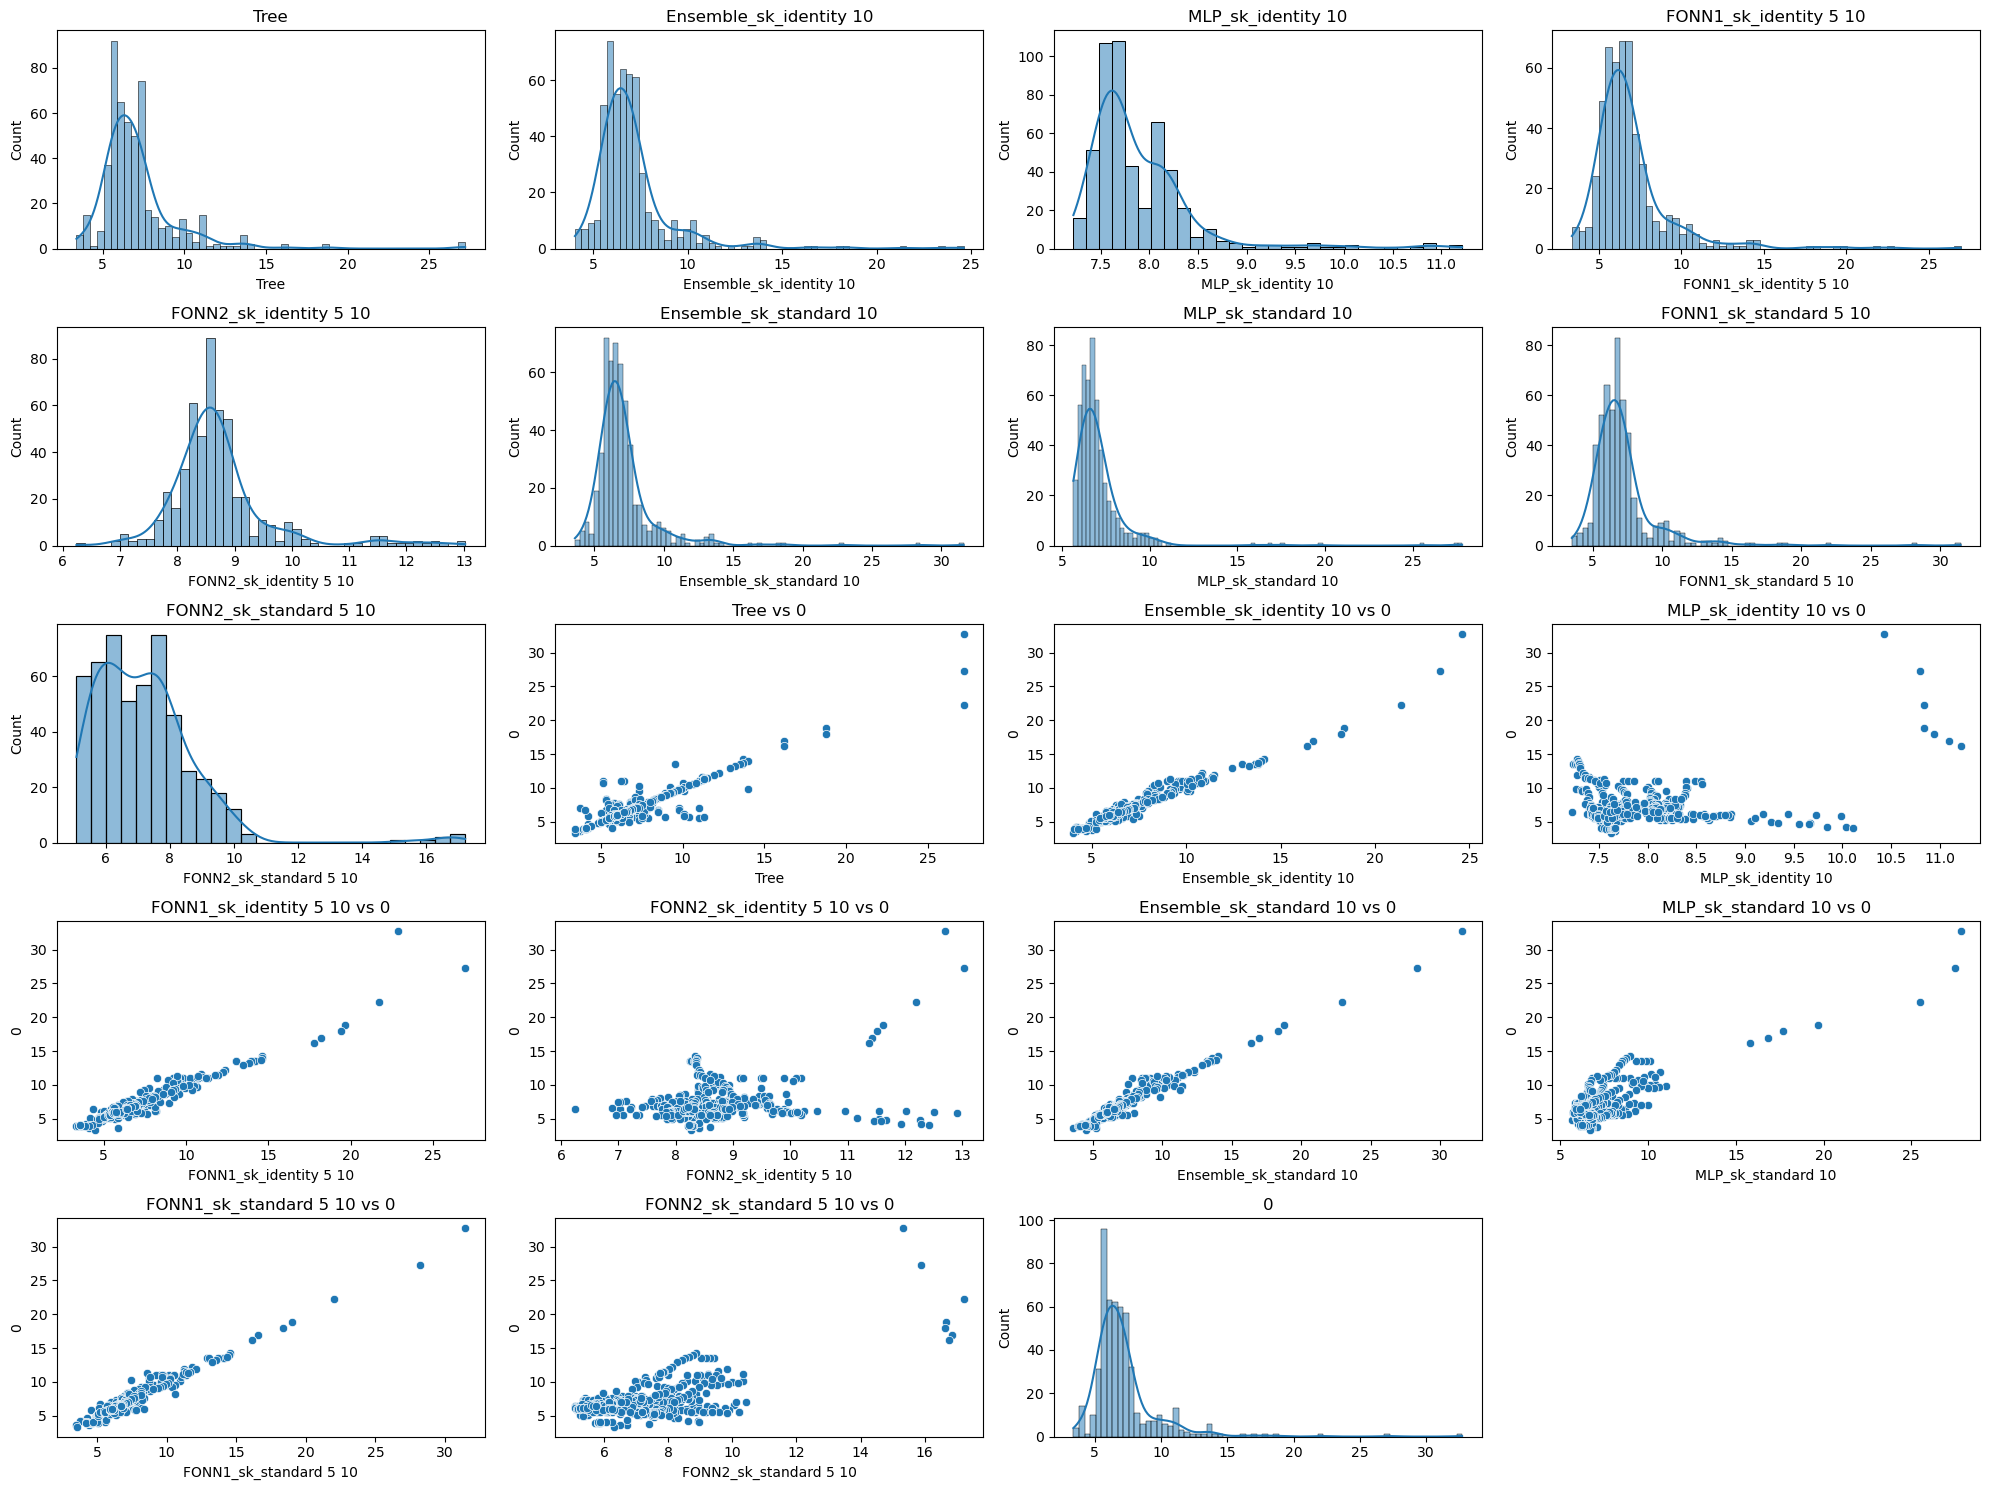

In [19]:
# Plot Predictions
plot_data(predictions, y)

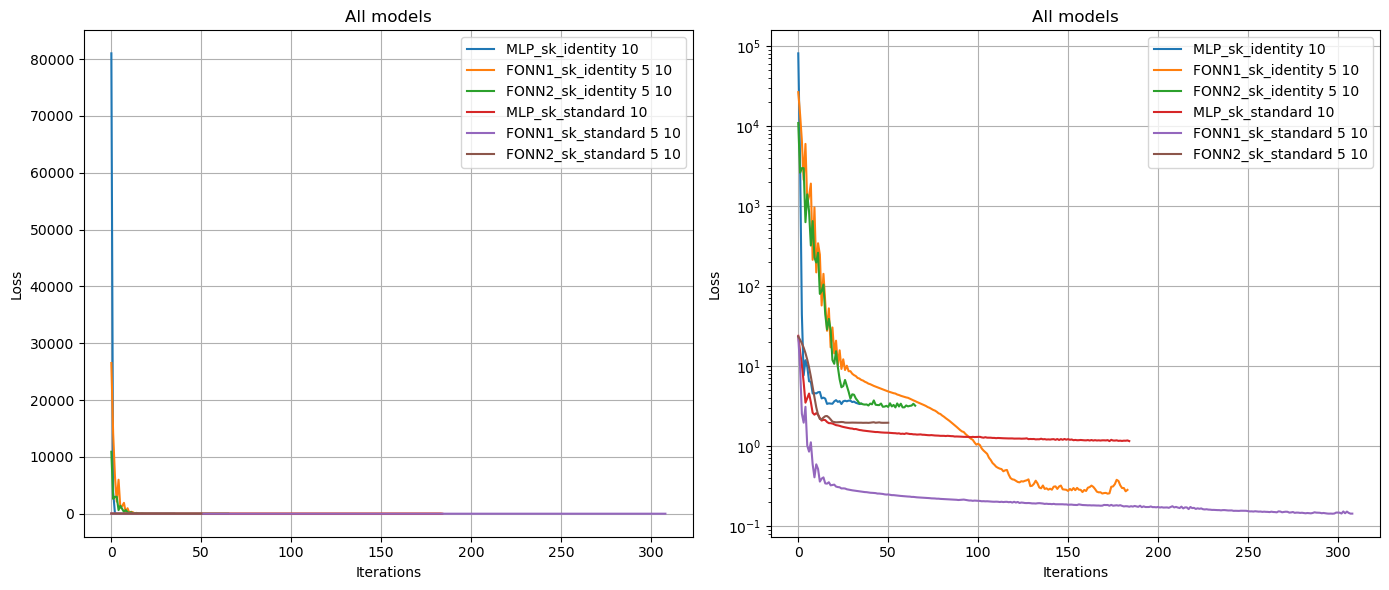

In [20]:
import matplotlib.pyplot as plt


def plot_loss(model, ax1, ax2, label):
    ax1.plot(model.loss_curve_, label=label)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.grid(True)

    ax2.plot(model.loss_curve_, label=label)
    ax2.set_yscale('log')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Loss')
    ax2.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for model_name, model in models.items():
    if hasattr(model.best_estimator_['model'], 'loss_curve_'):
        plot_loss(model.best_estimator_['model'], ax1, ax2, label=model_name)

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.set_title('All models')
ax1.legend()
ax1.grid(True)

ax2.set_yscale('log')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss')
ax2.set_title('All models')
ax2.legend()
ax2.grid(True)

fig.tight_layout()
fig.show()

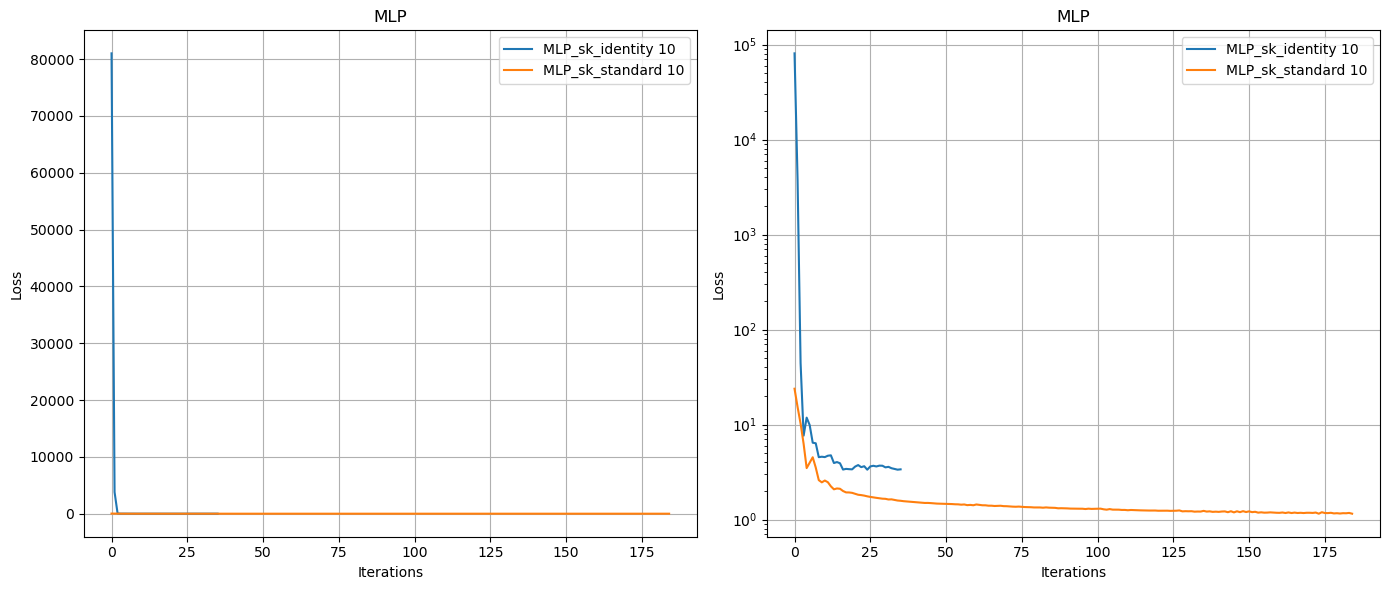

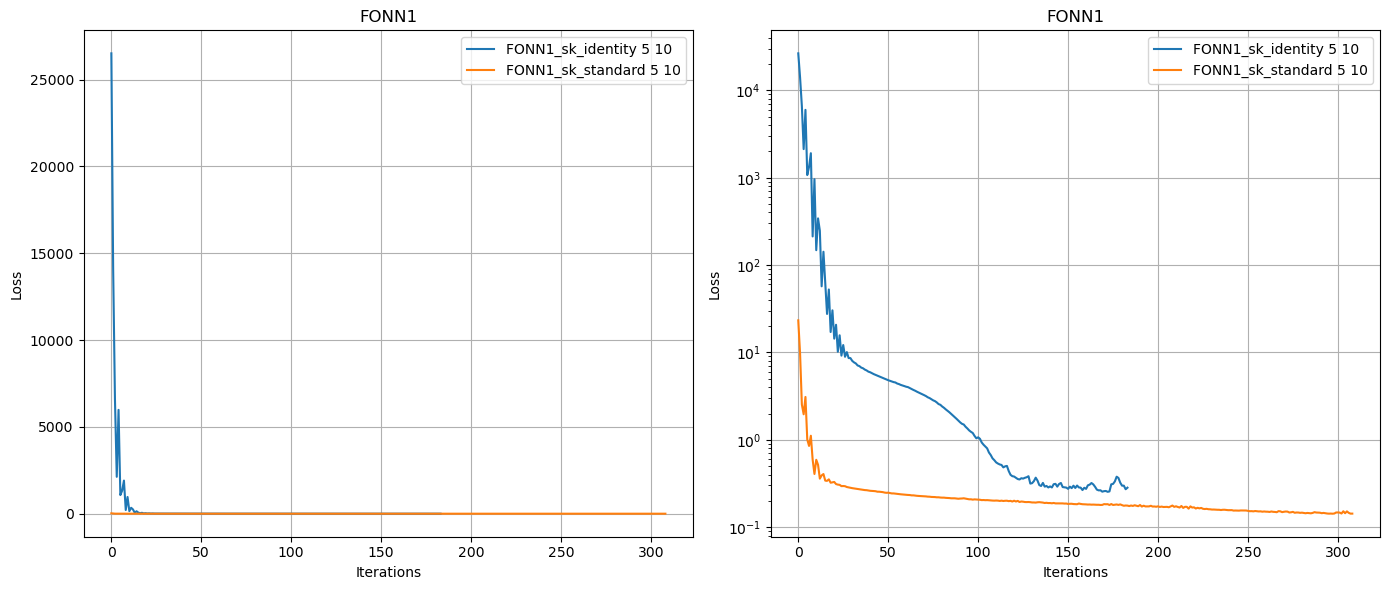

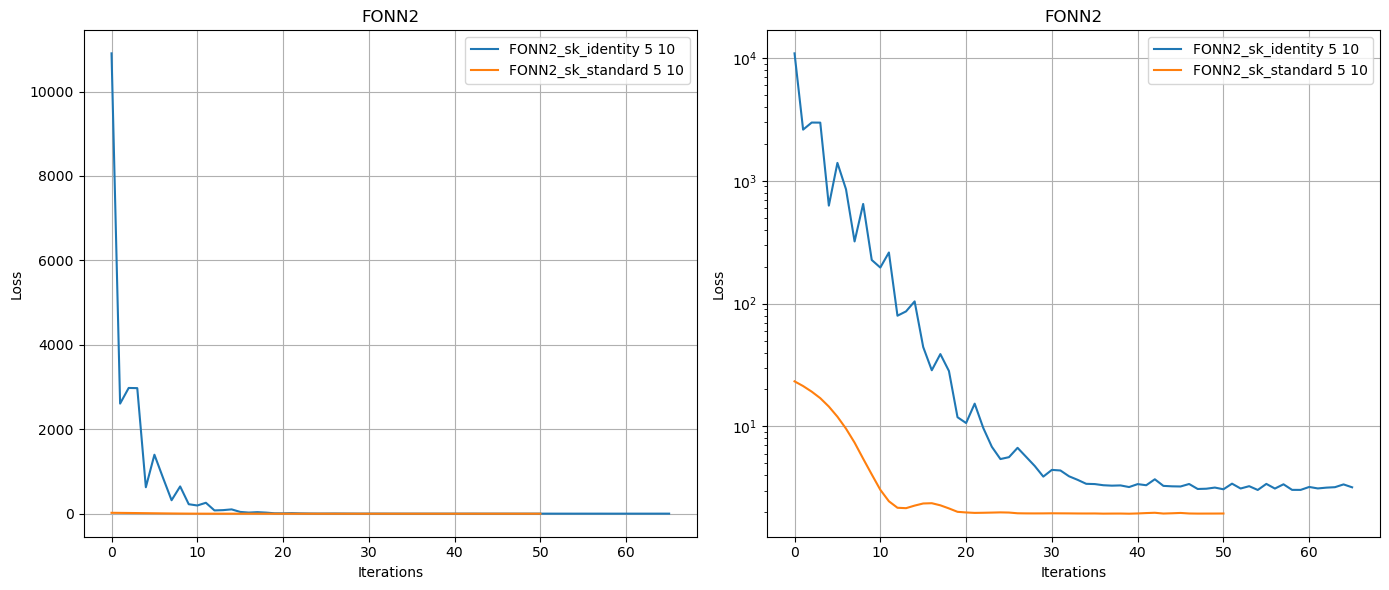

In [21]:
import matplotlib.pyplot as plt

plot_groups = {}
for model_name, model in models.items():
    if hasattr(model.best_estimator_['model'], 'loss_curve_'):
        key = model_name.split('_' if '_' in model_name else ' ')[0]
        if key not in plot_groups:
            plot_groups[key] = plt.subplots(1, 2, figsize=(14, 6))
        fig, (ax1, ax2) = plot_groups[key]
        plot_loss(model.best_estimator_['model'], ax1, ax2, model_name)

for group, plot in plot_groups.items():
    fig, (ax1, ax2) = plot
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.set_title(group)
    ax1.legend()
    ax1.grid(True)

    ax2.set_yscale('log')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Loss')
    ax2.set_title(group)
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout()
    fig.show()

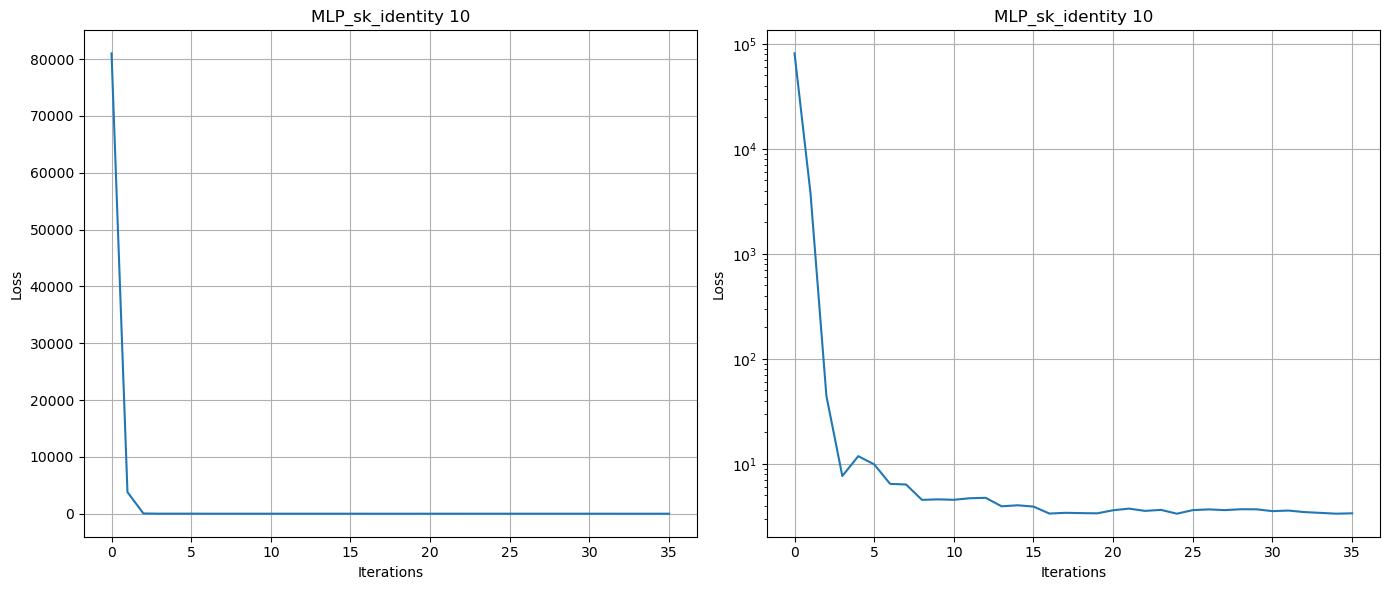

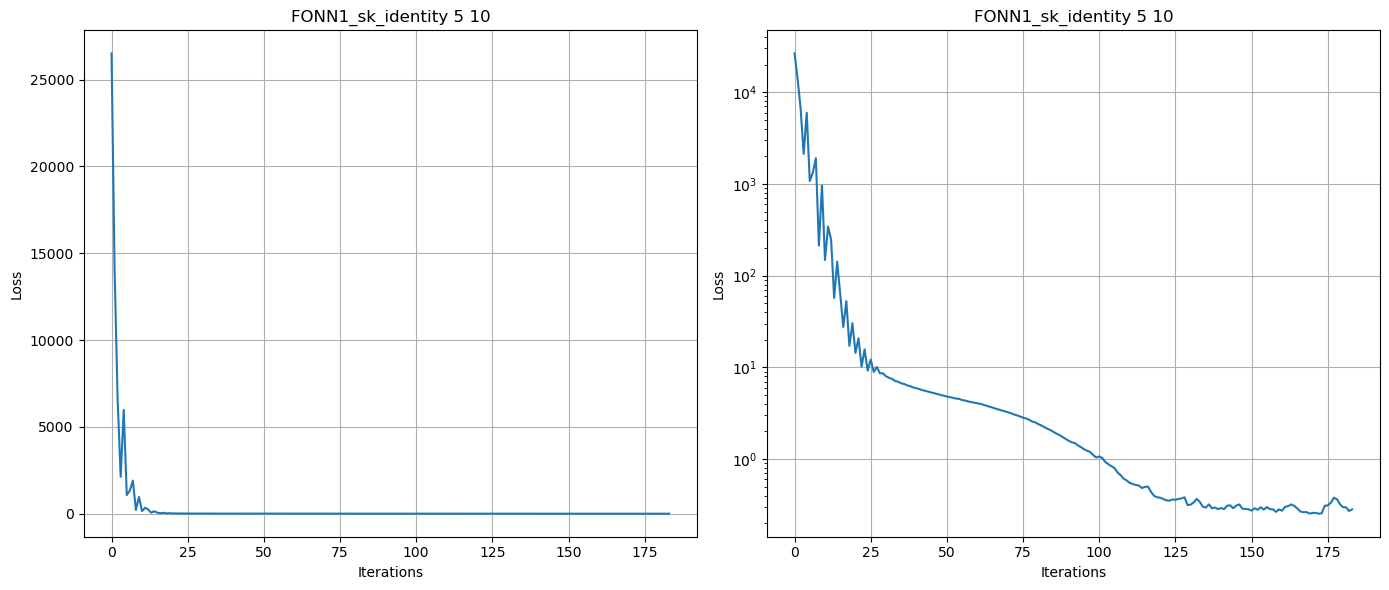

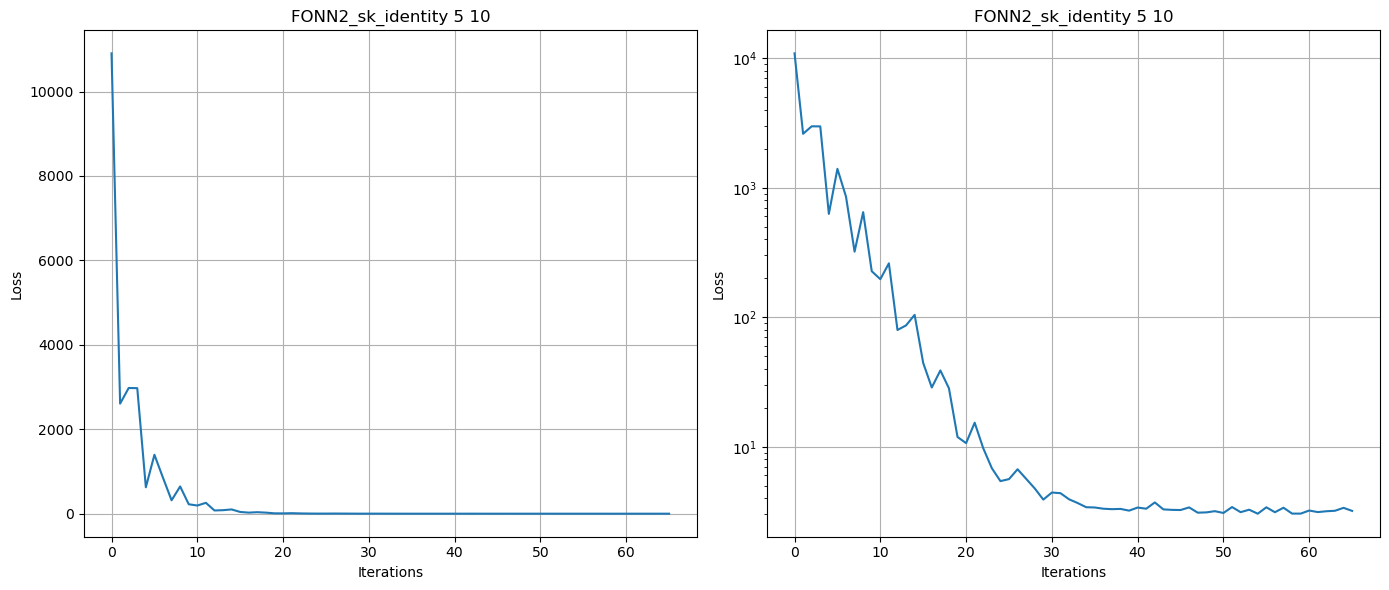

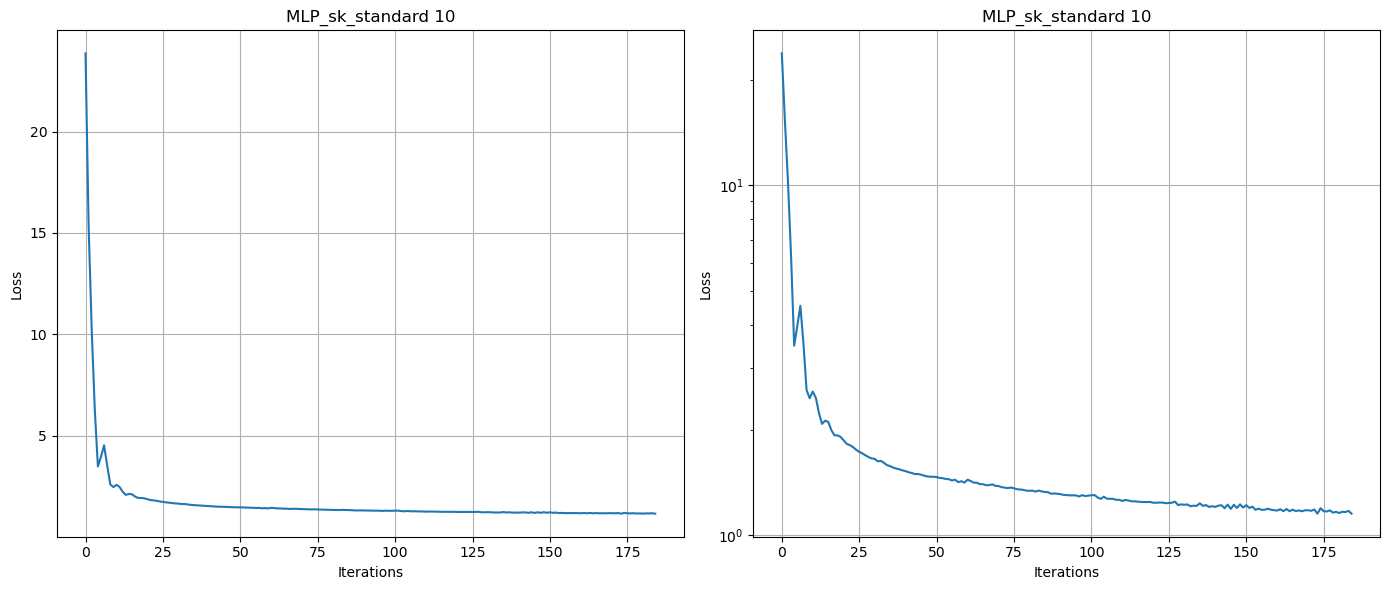

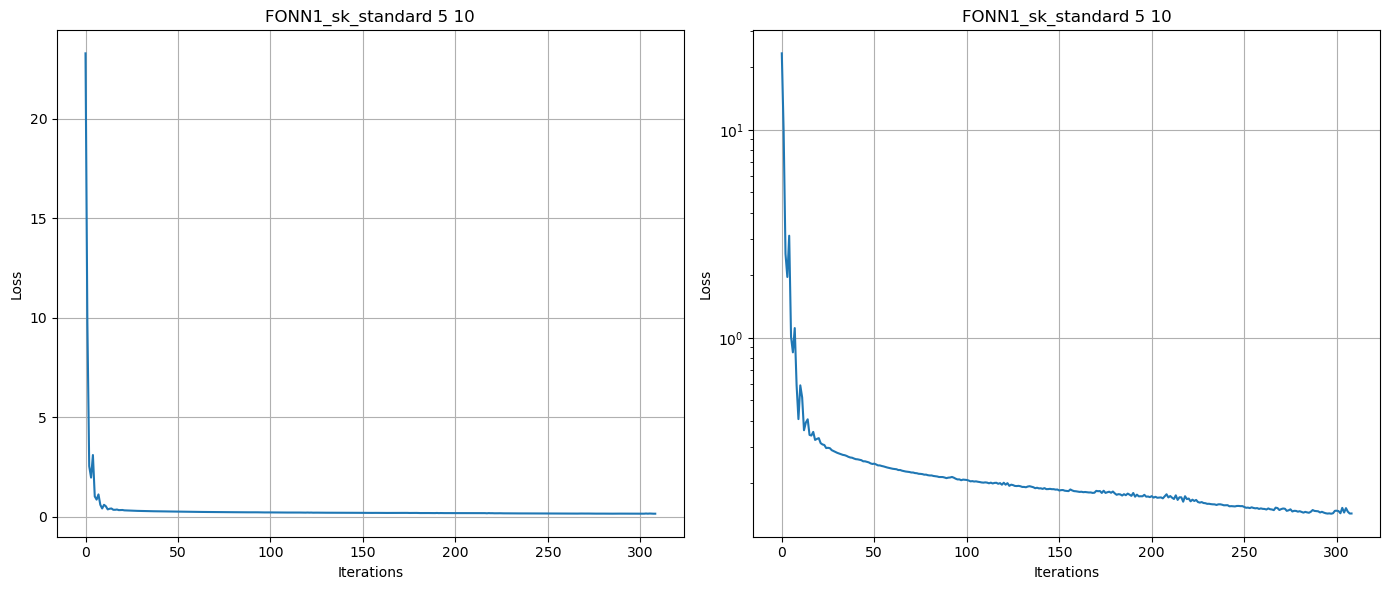

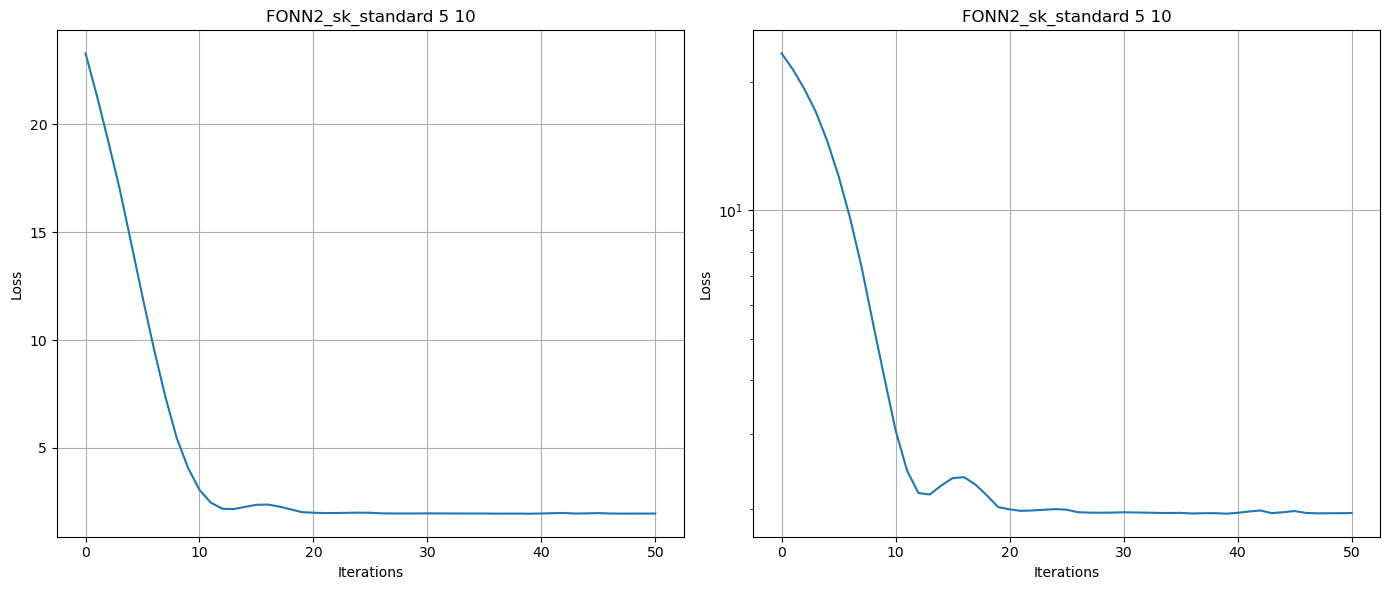

In [22]:
for model_name, model in models.items():
    if hasattr(model.best_estimator_['model'], 'loss_curve_'):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        plot_loss(model.best_estimator_['model'], ax1, ax2, model_name)
        ax1.set_title(model_name)
        ax2.set_title(model_name)
        fig.tight_layout()
        fig.show()